<a href="https://colab.research.google.com/github/ekomissarov/data-analysis/blob/main/2_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Variance and Standard deviation calculation for Series

In [80]:
#@title manual calculations
import pandas as pd

data = pd.Series([1, 2, 3, 4, 5, 6])

mean = data.mean()
variance = 0
for i in data:
	variance += (i - mean) * (i - mean)
variance /= len(data)

std = variance**0.5

print(f"series: {data}")
print(f"standard deviation: {std}")
print(f"varianceiance: {variance}")

series: 0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64
standard deviation: 1.707825127659933
varianceiance: 2.9166666666666665


In [81]:
#@title calculating using library
import numpy as np
print(f"variance: {np.var(data)}")
print(f"standard deviation {np.std(data)}")

variance: 2.9166666666666665
standard deviation 1.707825127659933


#Variance and Standard deviation for random discrete variable distribution

In [82]:
#@title manual calculations
random_values = [10, 11, 15, 18, 20]
probabilities = [0.3, 0.2, 0.1, 0.15, 0.25]

class DistRand_DescreteVar:

    def __init__(self, val, prob):
        if abs(sum(prob) - 1) > 0.0001:
            raise Exception("the distribution of a random discrete variable is incorrectly specified")
        if len(val) != len(prob):
            raise Exception("values array length is not equal probabilities array length")

        self.px = [(i, j) for i, j in zip(val, prob)]
        self.px.sort(key=lambda x: x[0])
        self.__px = {i:j for i,j in self.px}
        self.expected_value = None
        self.variance = None
        self.standard_deviation = None


    def P(self, x):
        """
        returns probability
        """
        return self.__px[x]

    def E(self):
        """
        returns expected value
        """
        if self.expected_value is None:
            self.expected_value = sum(i*j for i,j in self.px)
        return self.expected_value

    def V(self):
        """
        returns variance
        """
        if self.expected_value is None:
            self.expected_value = self.E()
        if self.variance is None:
            self.variance = sum((i-self.expected_value)**2*j for i,j in self.px)
            #e_x2 = sum(i**2*j for i,j in self.px)
            #var2 = e_x2 - self.expected_value**2
        return self.variance

    def D(self):
        """
        returns standard deviation
        """
        if self.variance is None:
            self.variance = self.V()
        if self.standard_deviation is None:
            self.standard_deviation = self.variance**0.5
        return self.standard_deviation

    def cdf(self, x):
        """
        returns cumulative distribution function on closed interval [0, x]
        """
        summator = 0
        for i in self.px:
            if i[0]<=x:
                summator += i[1]
            else:
                break

        return summator
    def ppf(self, x):
        """
        returns percent point function
        """
        if x<0 or x>1:
            raise Exception("x not in interval [0, 1]")

        summator = 0
        if summator == x:
            return -1

        for v, p in self.px:
            if summator + p >= x:
                return v
            summator += p

        return self.px[-1][0]


rdv = DistRand_DescreteVar(random_values, probabilities)
print(f"E[x] = {rdv.E()}, D[x] = {rdv.D()}, V[x] = {rdv.V()}")
print(f"cdf(11) = {rdv.cdf(11)}")
print(f"ppf(0.5) = {rdv.ppf(0.5)}")

E[x] = 14.4, D[x] = 4.235563716909474, V[x] = 17.939999999999998
cdf(11) = 0.5
ppf(0.5) = 11


#Binomial distribution

- each trial is a Bernoulli experiment with only two independent results
- number of trials is fixed - n
- probability of success is the same in every trial - p



<BarContainer object of 26 artists>

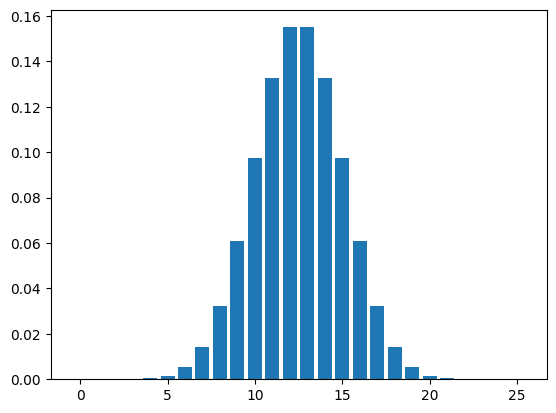

In [83]:
#@title manual calculations - pmf
from matplotlib import pyplot as plt
from math import factorial

n = 25 # number of trials
p = 0.5 # success probability

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k)
    distr.append(prob)

# The probability mass function (pmf) for binomial distribution
plt.bar(range(0, n + 1), distr)

<BarContainer object of 26 artists>

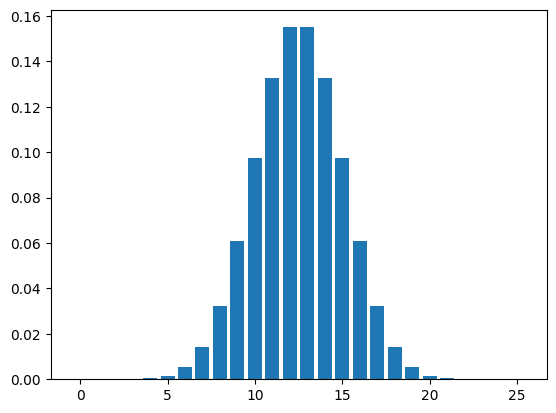

In [84]:
#@title calculating using library - pmf
from scipy.stats import binom
n = 25 # number of trials
p = 0.5 # success probability

rv = binom(n, p)
plt.bar(range(n+1), rv.pmf(range(n+1)))

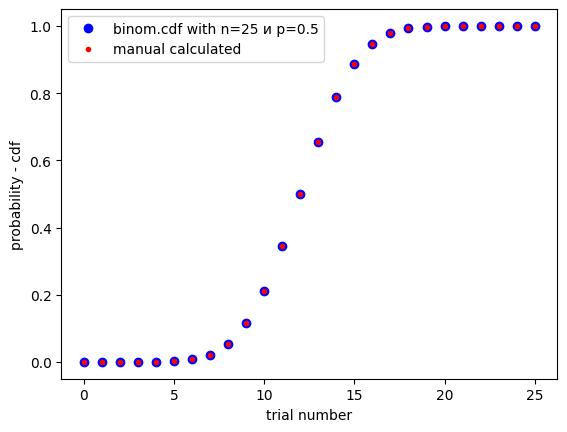

In [85]:
#@title cdf - cummulative distribution function

n = 25 # number of trials
p = 0.5 # success probability

rv = binom(n, p)
rdv = DistRand_DescreteVar(list(range(n)), list(rv.pmf(range(n))))

plt.plot(range(n+1), binom.cdf(range(n+1), n, p), 'bo', label=f'binom.cdf with n={n} и p={p}')
plt.plot(range(n+1), [rdv.cdf(i) for i in range(n+1)], 'r.', label='manual calculated')
plt.xlabel(f"trial number")
plt.ylabel('probability - cdf')
plt.legend()
plt.show()

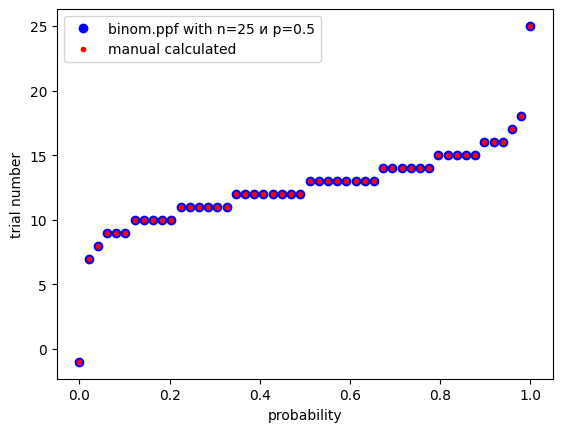

In [86]:
#@title ppf - percent point function

n = 25 # number of trials
p = 0.5 # success probability
ls = np.linspace(0, 1, 50)

rv = binom(n, p)
rdv = DistRand_DescreteVar(list(range(n+1)), list(rv.pmf(range(n+1))))

plt.plot(ls, binom.ppf(ls, n, p), 'bo', label=f'binom.ppf with n={n} и p={p}')
plt.plot(ls, [rdv.ppf(i) for i in ls], 'r.', label='manual calculated')
plt.xlabel(f"probability")
plt.ylabel("trial number")
plt.legend()
plt.show()

<BarContainer object of 26 artists>

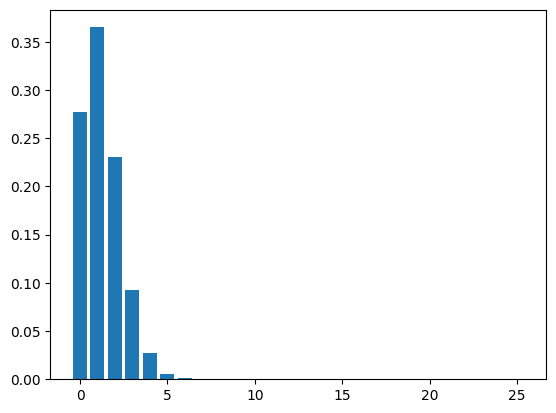

In [87]:
#@title binom(25, 0.05) - pmf
from scipy.stats import binom
n = 25 # number of trials
p = 0.05 # success probability

rv = binom(n, p)
plt.bar(range(n+1), rv.pmf(range(n+1)))

<BarContainer object of 26 artists>

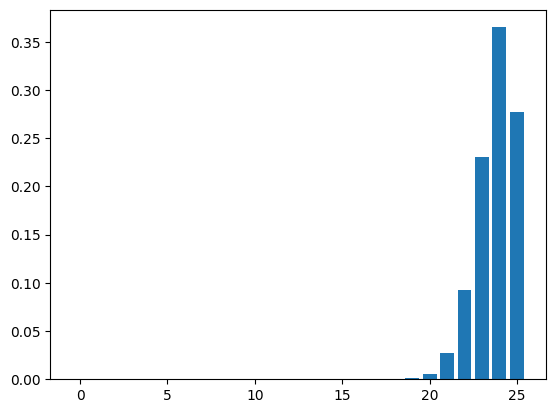

In [88]:
#@title binom(25, 0.95) - pmf
from scipy.stats import binom
n = 25 # number of trials
p = 0.95 # success probability

rv = binom(n, p)
plt.bar(range(n+1), rv.pmf(range(n+1)))

The company is planning a significant event, and the PR team aims to secure media coverage, seeking at least 6 media partners. Historically, one out of every 5 media outlets approached agrees to partnership. Therefore, negotiations are initially planned with 30 media outlets to achieve the target. To analyze this scenario, we need to construct probability distributions and histograms for the random variable 'number of media partners' when negotiations begin with 30 media.

Probability to get at least 6 media: 0.57 - high risk
Probability to get at least 6 media if n = 50: 0.95 - ok
Mode: 6


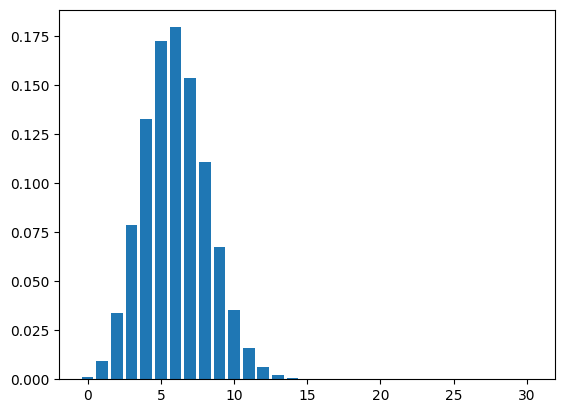

In [89]:
#@title example
from scipy.stats import binom
n = 30 # number of trials
p = 1/5 # success probability

rv = binom(n, p)
plt.bar(range(n+1), rv.pmf(range(n+1)))
print(f"Probability to get at least 6 media: {1-binom.cdf(5, n, p):.2f} - high risk")
print(f"Probability to get at least 6 media if n = 50: {1-binom.cdf(5, 50, p):.2f} - ok")
print(f"Mode: {int((n+1)*p)}") #the mode is the value that appears most often in a set of data values

#Continuous uniform distribution

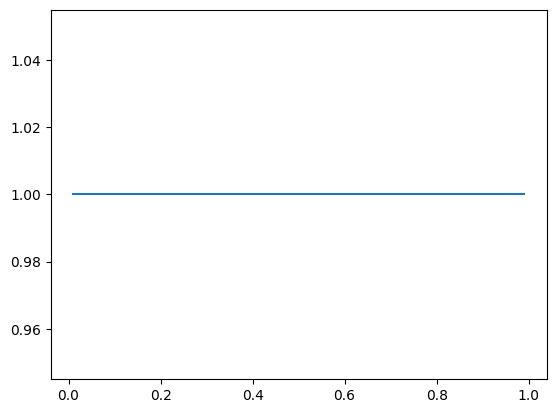

In [90]:
#@title uniform pdf (probability density function) & ppf
import numpy as np
from scipy.stats import uniform
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
plt.plot(x, uniform.pdf(x), label='uniform pdf')

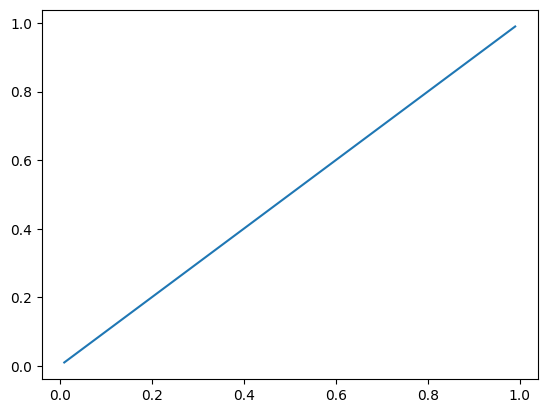

In [91]:
#@title uniform cdf
plt.plot(x, uniform.cdf(x), label='uniform pdf')

#Normal distribution

X ∼ N(μ, σ²)

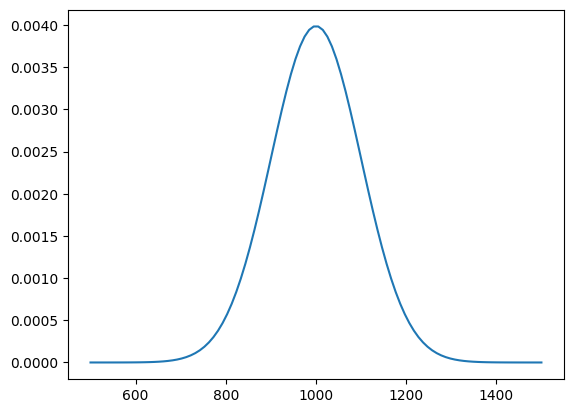

In [92]:
#@title probability density function - pdf
from scipy.stats import norm

mu = 1000  #expected value
sigma = 100  #standard deviation
x = np.linspace(mu-5*sigma, mu+5*sigma, 100)

distr = norm(mu, sigma)

plt.plot(x, distr.pdf(x))

mu-sigma, mu+sigma probability: 0.6827
mu-2sigma, mu+2sigma probability: 0.9545
mu-3sigma, mu+3sigma probability: 0.9973


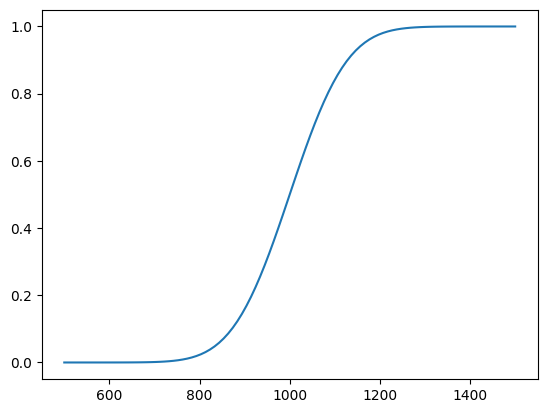

In [93]:
#@title cumulative distribution function - cdf
from scipy.stats import norm

mu = 1000  #expected value
sigma = 100  #standard deviation
x = np.linspace(mu-5*sigma, mu+5*sigma, 100)

distr = norm(mu, sigma)

plt.plot(x, distr.cdf(x))
print(f"mu-sigma, mu+sigma probability: {distr.cdf(mu+sigma) - distr.cdf(mu-sigma):.4f}")
print(f"mu-2sigma, mu+2sigma probability: {distr.cdf(mu+2*sigma) - distr.cdf(mu-2*sigma):.4f}")
print(f"mu-3sigma, mu+3sigma probability: {distr.cdf(mu+3*sigma) - distr.cdf(mu-3*sigma):.4f}")

25 percentile 933 - 75 percentile: 1067


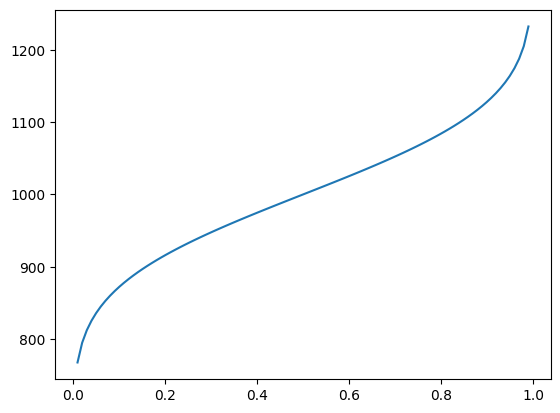

In [94]:
#@title percent point function - ppf
from scipy.stats import norm

mu = 1000  #expected value
sigma = 100  #standard deviation
x = np.linspace(0, 1, 100)

distr = norm(mu, sigma)

plt.plot(x, distr.ppf(x))
print(f"25 percentile {distr.ppf(0.25):.0f} - 75 percentile: {distr.ppf(0.75):.0f}")

#Standard normal distribution

X ∼ N(0, 1)

X ∼ N(μ, σ²) ⇒ (X−μ) / σ ∼ N(0,1)

Z-Score - indicates how many standard deviations a data point is from the mean of the distribution. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean.


Ex. The school organizes long jump competitions for its students. It is known that the jump lengths are normally distributed, albeit with different parameters for each gender: boys have an average jump length of 3.9 meters with a standard deviation of 0.5 meters, while girls have an average of 3.5 meters with a standard deviation of 0.7 meters. The competition organizers aim to set a threshold jump length for awarding certificates such that the probability of surpassing this threshold is equal for both boys and girls.

M∼N(3.9,0.5²)

F∼N(3.5,0.7²)

P(M≥a)=P(F≥a), a-?

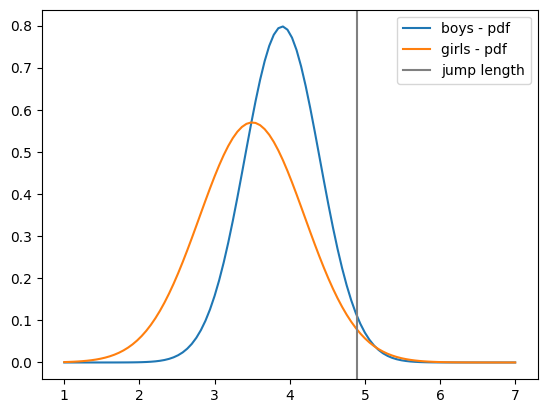

Probability for girls award certificate: 0.02275
Probability for boys award certificate: 0.02275
Jump length:  4.9


In [95]:
#@title example1
from scipy.stats import norm
mu_M, sigma_M = 3.9, 0.5
mu_F, sigma_F = 3.5, 0.7

M = norm(mu_M, sigma_M)
F = norm(mu_F, sigma_F)
a = (sigma_F*mu_M - sigma_M*mu_F) / (sigma_F - sigma_M)

x = np.linspace(1, 7, 100)
plt.plot(x, M.pdf(x), label = 'boys - pdf')
plt.plot(x, F.pdf(x), label = 'girls - pdf')
plt.axvline(x=a, color='gray', label = 'jump length')
plt.legend()
plt.show()

print("Probability for girls award certificate:", round(1 - F.cdf(a), 5))
print("Probability for boys award certificate:", round(1 - M.cdf(a), 5))
print("Jump length: ", round(a, 2))

ex. The online store sells tool sets. The number of sets the store sells in a week is normally distributed with a mean of 420 and a standard deviation of 65. How many sets does the purchasing department need to order to sell them all next week with probability 90%?

In [96]:
#@title example2
from scipy import stats as st
mu, sigma, prob = 420, 65, 0.9
distr = st.norm(mu, sigma)
n_shipment = distr.ppf(1-prob)
print('Tool sets to order:', int(n_shipment))

Tool sets to order: 336


ex. In an online store, orders placed by users have a cost that follows a normal distribution, with a mean of 2400 money and a standard deviation of 320 money. The store aims to determine a fixed price for delivery. Research indicates that users become upset when shipping costs equal or exceed half the order price. The objective is to find the courier delivery cost such that for 3/4 of orders, it does not exceed half the order price.

In [97]:
#@title example3
from scipy import stats as st
mu, sigma, threshold = 2400, 320, 3/4
max_delivery_price = st.norm(mu, sigma).ppf(1-threshold) / 2
print("Max delivery cost: ", max_delivery_price)

Max delivery cost:  1092.0816399686269


#Poisson distribution

Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time if these events occur with a known constant mean rate and independently of the time since the last event.

we will conduct Bernoulli tests with a small probability of success many times in a row at equal intervals of time

Examples
*  Football players score goals at an average intensity of 2.7 goals per match.
*  Cafes usually order an average of 35 servings of soup per hour during lunch hours.
*  During the polar night in the polar city, the northern lights usually appear 3 times a week.
*  In the summer, tornadoes occur in certain areas - an average of 8.1 tornadoes per month.

P(Y=k) = λ^k / (k! * e^λ)

Y∼Pois(3), λ=3 success in a period.

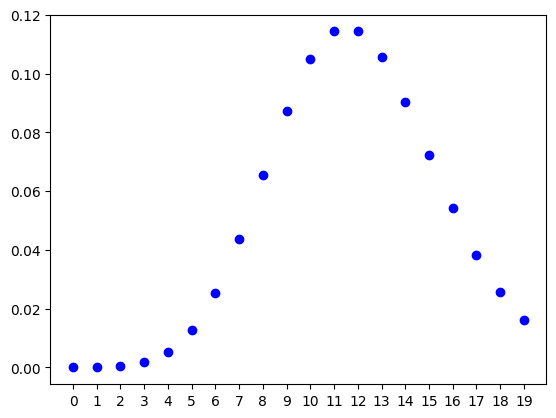

In [98]:
#@title  probability mass function - pmf
import matplotlib.pyplot as plt
from scipy.stats import poisson
from math import factorial, exp

distr = []
for k in range(20):
    #p = (lmbd ** k) / (factorial(k) * exp(lmbd))
    p = poisson.pmf(k, lmbd)
    distr.append(p)

plt.plot(range(20), distr, 'bo')
plt.xticks(range(20))
plt.show()

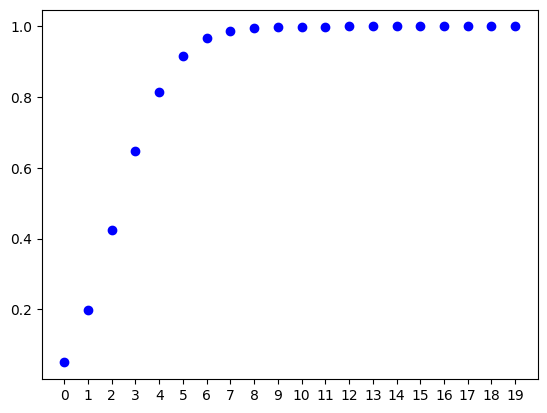

In [99]:
#@title poisson cdf
from scipy.stats import poisson

lmbd = 3

plt.plot(range(20), poisson.cdf(range(20), lmbd), 'bo')
plt.xticks(range(20))
plt.show()

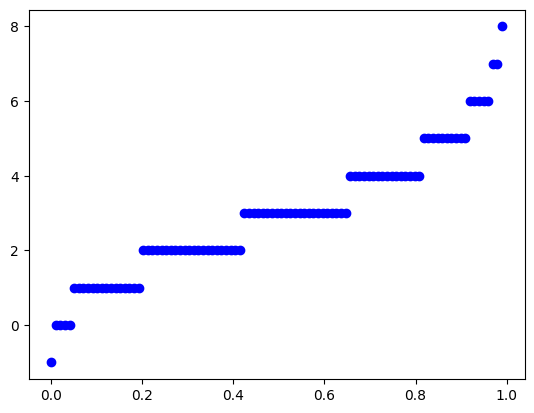

In [100]:
#@title poisson ppf
from scipy.stats import poisson

lmbd = 3
x = np.linspace(0, 1, 100)

plt.plot(x, poisson.ppf(x, lmbd), 'bo')
plt.show()

#Approximation of the binomial distribution by the Poisson distribution

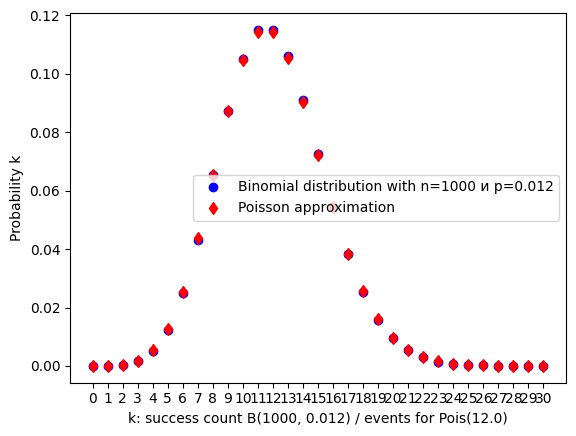

Avg difference probability: 0.00018678129182137234
Max difference probability: 0.0006923293169307787


In [101]:
#@title binomial vs poisson distribution - err approximation
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# binomial distribution parameters
n = 1000
p = 0.012

# poisson distribution lambda parameter
lmbd = n * p

# k maximum value
max_value = 30

binom_probs = []
poisson_probs = []

for k in range(max_value + 1):
    binom_prob = binom.pmf(k, n, p)
    poisson_prob = poisson.pmf(k, lmbd)

    binom_probs.append(binom_prob)
    poisson_probs.append(poisson_prob)


plt.plot(range(max_value + 1), binom_probs, 'bo', label=f'Binomial distribution with n={n} и p={p}')
plt.plot(range(max_value + 1), poisson_probs, 'rd', label='Poisson approximation')
plt.xlabel(f'k: success count B{n, p} / events for Pois({lmbd})')
plt.ylabel('Probability k')
plt.legend()
plt.xticks(range(max_value + 1))
plt.show()

# approx error
error_values = []
for i in range(max_value + 1):
    error = abs(binom_probs[i] - poisson_probs[i])
    error_values.append(error)

print('Avg difference probability:', sum(error_values) / len(error_values))
print('Max difference probability:', max(error_values))


Ex. Assuming a click-through rate of 1.2%, the company has ordered 1000 banner impressions per hour. We want to calculate the probability of receiving 70 clicks or more over several hours

In [102]:
#@title example
threshold = 70
lmbd_5 = 12 * 5
lmbd_8 = 12 * 8

print('P for 5 hours:', 1 - poisson.cdf(threshold - 1, lmbd_5))
print('P for 8 hours:', 1 - poisson.cdf(threshold - 1, lmbd_8))

P for 5 hours: 0.11178964695883675
P for 8 hours: 0.9976588561499148


#Approximation of the binomial distribution by normal

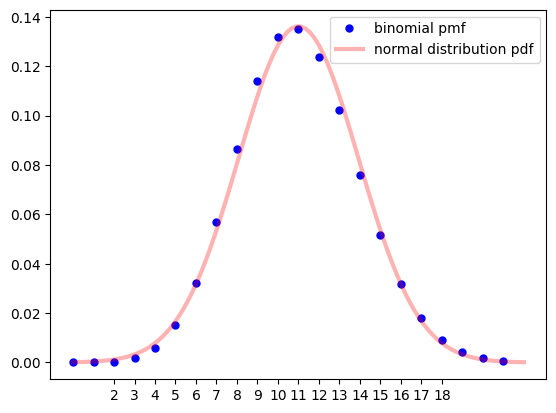

approximation is OK
Avg probability difference per velue: 0.0009394408224924896
Max probability difference: 0.006312500428049331


In [110]:
#@title binomial vs normal distribution - applicability check
from math import sqrt
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# binomial distribution parameters
n = 50
p = 0.22

# normal distribution parameters
mu = n * p
sigma = sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma)


def check_approx_applicability(mu, sigma, n):
    if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
        print('approximation is OK')
    else:
        print('approximation is not applicable')



left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))

x = list(range(max(0, left), right))  # seleect all positive numbers from left to right
ax = plt.subplot()
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='binomial pmf')
x = np.linspace(left, right, 100)
ax.plot(x, distr.pdf(x), 'r-', lw=3, alpha=0.3, label='normal distribution pdf')
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
ax.set_xticks(x_ticks)
ax.legend()
plt.show()

check_approx_applicability(mu, sigma, n)

# найдём суммарную ошибку аппроксимации:
error_values = []
for i in range(n + 1):
    error = abs(st.binom.pmf(i, n, p) - (distr.cdf(i + 0.5) - distr.cdf(i - 0.5)))
    error_values.append(error)

print('Avg probability difference per velue:', sum(error_values) / len(error_values))
print('Max probability difference:', max(error_values))

For example, you ordered one and a half million impressions of a banner and you know that 2.9% of those who viewed it click on it. You can also calculate the probability that you will receive fewer than 43,000 clicks using the binomial distribution. But it is more convenient and faster from a computational point of view to use the normal approximation.

In [116]:
#@title example
n = 1500000
p = 0.029

# normal distribution parameters
mu = n * p
sigma = sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma)

check_approx_applicability(mu, sigma, n)
print(distr.cdf(43000), binom.cdf(43000, n, p))


approximation is OK
0.00749020311724787 0.007462613163421514
